In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset_diabetes/diabetic_data.csv')

In [3]:
df.shape

(101766, 50)

### Initial Data Analysis -- Nulls, Data Type

In [4]:
### Commenting this out. Uncomment it if you want to see a sample of data ###
# df.head(5)

In [5]:
### Commenting this out. Uncomment it if you want to see column ###
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

There are two metabolic measures, 'max_glu_serum' and 'A1Cresult'.
There are also 23 drugs in the data set, from 'metaformin' to 'metformin-pioglitazone'.
We will look at null values and data types for the columns. 

In [6]:
### Commenting this out. Uncomment it if you want to see if there are NULL values ###
# df.isnull().sum()

In [7]:
### Commenting this out. Uncomment it if you want to see the data type for each column ###
# df.dtypes

Though there are no NULL values, we examine the data values below.

In [8]:
### Commenting this out. Uncomment it if you want to see a sample of data ###

# for col in df.columns[3:len(df['encounter_id'])]:
#     print(df[col].value_counts())

The data set does not contain any null value.  However, it includes "?", "None" and "No".  We look at the share of these values in the columns.

In [9]:
### Counting the share of NULL, missing data and "No".  
### "No" implies the patient not recieving the treatment in case of drugs.

### Initializing a list ###
df_null = []

### Counting the number of 'NULL', '?', 'None' and 'No' for each column. ###

for column in df.columns:
    df_null.append([column, df[column].isnull().sum()/len(df[column]), 
                    df[column].isin(['?']).sum()/len(df[column]),
                    df[column].isin(['None']).sum()/len(df[column]),
                    df[column].isin(['No']).sum()/len(df[column])
                   ]) 

### Creating a data frame
df_null = pd.DataFrame(df_null)

### Renaming columns
df_null.rename (columns= {0: 'Variable', 1: 'NULL', 2: '?', 3: 'None', 4: 'No'}, inplace= True) 

df_null

,Variable,NULL,?,None,No
0,encounter_id,0.0,0.000000,0.000000,0.000000
1,patient_nbr,0.0,0.000000,0.000000,0.000000
2,race,0.0,0.022336,0.000000,0.000000
3,gender,0.0,0.000000,0.000000,0.000000
4,age,0.0,0.000000,0.000000,0.000000
5,weight,0.0,0.968585,0.000000,0.000000
6,admission_type_id,0.0,0.000000,0.000000,0.000000
7,discharge_disposition_id,0.0,0.000000,0.000000,0.000000
8,admission_source_id,0.0,0.000000,0.000000,0.000000
9,time_in_hospital,0.0,0.000000,0.000000,0.000000


#### Observations on ?, None and No

1. '?' Value: 
 - Dropped: 97% of weight, 40% of Medical Speciality and 49% of Payer Code have ? value, which strongly indicates missing value.  These three variables will be dropped.
 - Impute: 2% of the data have missing gender value and shall be imputed.
 - Diagnosis -- 0.02% of data have missing diag_1 code and we shall assume a value of zero. diag_2 and diag_3 have missing values with missing diag_3 > missing diag_2 > missing diag_1 .  This implies that patients can have less than 3 diagnoses.

2. "None" Value:max_glu_serum and A1Cresult have 95% and 83% 'None' values.  Other values for this data are ("Norm", ">200", ">300") and "Norm", ">7", ">8").  These two variables are important metabolic measures and further investigation is required.

3. "No" Value: All "No" values are for medication and implies that the subject has not been given that medication.


In [10]:
df['change'].value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

The 'change' flag indicates if the medication dosage or the drug has been changed and is denoted by 'Ch'.

#### Drugs Administered -- Countnig Change -- "Up", "Steady", "Down"
Most patients are on insulin (54%).  Other than 20% on metamorfin and 12.5% on glipizide and 10.5% on glyburide, the usage of the other drugs are very low.
We create three new columns to capture the count of 'Up', 'Steady' and 'Down' for the 23 drugs in the data set for each row. These are the indicators of performace of the drug administered.

In [11]:

drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']



for x in df:
    count = 0
    for drug in drugs:
        count = count + (df[drug] =='Up')
    df['Up'] = count

for x in df:
    count = 0
    for drug in drugs:
        count = count + (df[drug] =='Steady')
    df['Steady'] = count

for x in df:
    count = 0
    for drug in drugs:
        count = count + (df[drug] =='Down')
    df['Down'] = count


##### Create summary table of 'Up', 'Steady' and 'Down' of the 23 drugs.

In [12]:
### Creating a list of drugs ###

features = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 
            'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 
            'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 
            'examide', 'citoglipton', 'insulin','glyburide-metformin', 
            'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
            'metformin-pioglitazone' ]

### Initialize a list ###
drug = []

### Countng the number of 'Down', 'Steady', 'Up' and 'No' for each feature in features list ###

for feature in features:

    drug.append([feature, df[df[feature]== 'Down'].shape[0], df[df[feature]== 'Steady'].shape[0], 
                df[df[feature]== 'Up'].shape[0],df[df[feature]== 'No'].shape[0], df.shape[0], 
                 df[df[feature]== 'No'].shape[0]/df.shape[0]])
    
### Converting to a data frame ###   
drug = pd.DataFrame(drug)

drug.sort_values(by=1, axis=0, ascending=False, inplace=True)

### Renaming column headers
drug.rename (columns= {0: 'drug_name', 1: 'Down', 2: 'Steady', 3: 'Up', 4: 'No', 5: 'Total', 6: '%age_No'}, inplace= True) 

### Output all ##
drug.head(25)

,drug_name,Down,Steady,Up,No,Total,%age_No
17,insulin,12218,30849,11316,47383,101766,0.465607
0,metformin,575,18346,1067,81778,101766,0.803589
7,glyburide,564,9274,812,91116,101766,0.895348
6,glipizide,560,11356,770,89080,101766,0.875341
4,glimepiride,194,4670,327,96575,101766,0.948991
9,pioglitazone,118,6976,234,94438,101766,0.927992
10,rosiglitazone,87,6100,178,95401,101766,0.937455
1,repaglinide,45,1384,110,100227,101766,0.984877
2,nateglinide,11,668,24,101063,101766,0.993092
18,glyburide-metformin,6,692,8,101060,101766,0.993063


##### Rollng up all drugs that are administered to less than 1,000 to 'Others'.
Keeing  Top 8 drugs  administered to 1,000+ individuals.  ['insulin','metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide','pioglitazone', 'rosiglitazone'].  

Creating a column that counts the no of drugs administered to an individual.

In [13]:
### Counting the total number of changes inn drug status and storing in a new column, 'drug_count'
df['drug_count'] = df['Up'] + df['Steady'] + df['Down']

# df['drug_count'].value_counts()

#### "diagnosis_count"
User created value counts of diag_1, diag_2 and diag_3
Creating a column that counts the no of diagnosis identified for an individual.

In [14]:
### Counting the number of disgnosis for each row and storing in a new column, 'diagnosis_count'
isY = lambda x:int(x!='?')
countDiagnosis = lambda row: isY(row['diag_1']) + isY(row['diag_2']) + isY(row['diag_3'])
df['diagnosis_count'] = df.apply(countDiagnosis,axis=1)

df['diagnosis_count'].value_counts()

3    100244
2      1243
1       278
0         1
Name: diagnosis_count, dtype: int64

Converting drug outcome to numeric.

In [15]:
### Creating a list of drugs ###

features = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 
            'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 
            'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 
            'examide', 'citoglipton', 'insulin','glyburide-metformin', 
            'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
            'metformin-pioglitazone' ]


# drugs_to_keep = ['insulin','metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide','pioglitazone', 'rosiglitazone']

### creating a map dictonary ###

drug_outcome_map = {'No':0, 'Up':1, 'Steady':2, 'Down':3}


for drug in features:
        df[drug] = df[drug].map(drug_outcome_map)


Converting drugs outcomes of the ones to consolidate to 'drug_others' to numeric and storing the max value.

In [16]:
drugs_to_drop = ['nateglinide', 'glyburide-metformin','acarbose', 'miglitol', 'tolbutamide', 'chlorpropamide',         
                 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'acetohexamide', 'glipizide-metformin',
                 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']


df['drug_others'] = df[drugs_to_drop].max(axis=1)


####  The following variables have large tail of values that we will roll up.

| Column Name           | Values |       |
|-----------------------|--------|-------|
|                       | Top 10 | Top 5 |
| Admission Type        | 99.7%  | 89.8% |
| Discharge Disposition | 91.3%  | 85.6% |
| Admission Source      | 97.6%  | 92.2% |

In [17]:
### Retianing the Top 5 codes as shown below and assiging a ###
### code of 0 to others in the three diagnosis columns ####

df['admission_type_id'] =['0' if x not in (1,2,3,5,6) else x for x in df['admission_type_id']]

df['discharge_disposition_id'] = ['0' if x not in (1,2,3,6,18) else x for x in df['discharge_disposition_id']]

df['admission_source_id'] =['0' if x not in (7,1,17,4,6) else x for x in df['admission_source_id']]

##### Rolling up diagnosis codes to Top 10
There are 700+ diagnosis codes for each of the three diagnosis codes.  Only the Top 10 are retained and its share of capturing the diagnosis is shown below.

| Column Name | Share of Top 10 Codes |
|-------------|-----------------------|
| Diag_1      | 35%                   |
| Diag_2      | 42%                   |
| Diag_3      | 45%                   |


In [18]:
### Retianing the Top 10 diagnosis codes as shown below and assiging a ###
### code of 0 to others in the three diagnosis columns ####

df['diag_1'] =['0' if x not in ('428', '414' ,'786', '410', '486', '427', '491', '715', '682', '434') 
               else x for x in df['diag_1']]


df['diag_2'] =['0' if x not in ('276', '428','250','427','401','496','599','403','414','411') 
               else x for x in df['diag_2']]


df['diag_3'] =['0' if x not in ('250','401','276','428','427','414','496','403','585','272') 
               else x for x in df['diag_3']]

### Dropping Variables

In [19]:
### Dropping columns with large amount of missing data

cols_to_drop = ['encounter_id', 'patient_nbr','weight','payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult']

df = df.drop(columns = cols_to_drop)

In [20]:
pd.crosstab(df['race'], df['gender'])

gender,Female,Male,Unknown/Invalid
race,,,
?,1133,1138,2
AfricanAmerican,11728,7482,0
Asian,318,323,0
Caucasian,39689,36410,0
Hispanic,1092,945,0
Other,748,757,1


#### Dropping rows with missing gender and race reduces the dataset by 2,274.

In [21]:
### Dropping rows with missing gender and missing race ###

df = df[df['gender'] != 'Unknown/Invalid']

df = df[df['race'] != '?']

df.shape

(99492, 49)

#### Dropping drugs administered to 1,000 or less individuals

In [22]:
drugs_to_drop = ['nateglinide', 'glyburide-metformin','acarbose', 'miglitol', 'tolbutamide', 'chlorpropamide',         
                    'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'acetohexamide', 'glipizide-metformin',
                    'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']       

### Dropping select drug columns
df = df.drop(columns = drugs_to_drop)


### Examining the prepared data set

In [23]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted', 'Up',
       'Steady', 'Down', 'drug_count', 'diagnosis_count', 'drug_others'],
      dtype='object')

In [24]:
for col in df.columns:
    print(df[col].value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64
Female    53575
Male      45917
Name: gender, dtype: int64
[70-80)     25468
[60-70)     21988
[50-60)     16895
[80-90)     16800
[40-50)      9465
[30-40)      3699
[90-100)     2724
[20-30)      1611
[10-20)       682
[0-10)        160
Name: age, dtype: int64
1    52900
3    18507
2    17786
6     5225
5     4727
0      347
Name: admission_type_id, dtype: int64
1     58767
3     13614
6     12698
0      8679
18     3673
2      2061
Name: discharge_disposition_id, dtype: int64
7     56632
1     28854
17     6698
4      2986
0      2333
6      1989
Name: admission_source_id, dtype: int64
3     17342
2     16841
1     13877
4     13605
5      9763
6      7366
7      5720
8      4297
9      2940
10     2291
11     1816
12     1427
13     1189
14     1018
Name: time_in_hospital, dtype: int64
1      3146
43     2750
44     2448
45     2328
3

In [25]:
df.shape

(99492, 34)

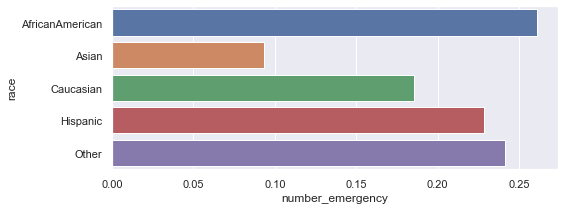

In [26]:
Emergency_Race = df.groupby(['race'], as_index=False)['number_emergency'].mean()
# daily_sum = bike.groupby(['dteday'], as_index=False)['count'].sim

plt.figure(figsize=(8, 3))
sns.set(style="darkgrid")
sns.barplot(x='number_emergency', y='race',  data=Emergency_Race, #hue = 'holiday',
              orient='h')
